In [1]:
# https://machinelearningmastery.com/visualize-machine-learning-data-python-pandas/

In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
demos = pd.read_csv("demos_clean.csv")
demos.drop(demos.columns[[0]], axis=1, inplace=True)
all_achi = pd.read_csv("all_achi.csv")
all_achi.drop(all_achi.columns[[0]], axis=1, inplace=True)
sw_achi = pd.read_csv("sw_achi.csv")
sw_achi.drop(sw_achi.columns[[0]], axis=1, inplace=True)

In [4]:
df1 = pd.merge(demos, all_achi, on='school_id', how='inner')
print(df1.dtypes)
#Note: changed drop to work with pandas 0.20.3, using rice
df1 = df1.drop(['school_name', 'state_name', 'school_id', 'district_id', 'total_race'], axis=1)

#for i in range(len(df1.columns)):
#    df1.iloc[:, i] = df1.iloc[:, i].fillna(df1.iloc[:, i].median(skipna=True))
df1 = df1.dropna(how='any')

school_name       object
state_name        object
school_id        float64
district_id      float64
pct_native       float64
pct_asian        float64
pct_hispanic     float64
pct_black        float64
pct_white        float64
pct_pacisl       float64
pct_mixed        float64
total_race       float64
free_lunch       float64
reduced_lunch    float64
total            float64
agg_achi         float64
dtype: object


In [5]:
df1_sw = pd.merge(demos, sw_achi, on='school_id', how='inner')
df1_sw = df1_sw.drop(labels=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'], axis=1)
#for i in range(len(df1_sw.columns)):
#    df1_sw.iloc[:, i] = df1_sw.iloc[:, i].fillna(df1_sw.iloc[:, i].median(skipna=True))
df1_sw = df1_sw.dropna(how='any')

In [6]:
grad = pd.read_csv("grad_clean.csv")
grad.drop(grad.columns[[0]], axis=1, inplace=True)
financials = pd.read_csv("financials_clean.csv")
financials.drop(financials.columns[[0]], axis=1, inplace=True)

In [7]:
df2 = pd.merge(demos, grad, on='school_id', how='inner')
df2 = pd.merge(df2, financials, on='district_id', how='inner')
df2 = pd.merge(df2, all_achi, on='school_id', how='inner')

In [8]:
#drop attributes used for data processing
df2 = df2.drop(labels=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'], axis=1)
#drop attributes that were pulled, but not predictive
df2 = df2.drop(labels=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'], axis=1)
df2.total_salaries = df2.total_salaries/df2.total
df2.salaries_instruction = df2.salaries_instruction/df2.total
df2.salaries_teachers = df2.salaries_teachers/df2.total
df2 = df2.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})

                             school_name   state_name     school_id  \
0                     MARANA HIGH SCHOOL      Arizona  4.046300e+10   
1                       MCAT HIGH SCHOOL      Arizona  4.046300e+10   
2              MOUNTAIN VIEW HIGH SCHOOL      Arizona  4.046300e+10   
3                 AAEC - PARADISE VALLEY      Arizona  4.001060e+10   
4                     AAEC - SMCC CAMPUS      Arizona  4.004170e+10   
5                     ABBEVILLE HIGH SCH      Alabama  1.017400e+10   
6                      HEADLAND HIGH SCH      Alabama  1.017400e+10   
7            ABC SECONDARY (ALTERNATIVE)   California  6.016201e+10   
8                           ARTESIA HIGH   California  6.016200e+10   
9                          CERRITOS HIGH   California  6.016200e+10   
10                   GAHR (RICHARD) HIGH   California  6.016200e+10   
11    TRACY (WILBUR) HIGH (CONTINUATION)   California  6.016200e+10   
12               WHITNEY (GRETCHEN) HIGH   California  6.016200e+10   
13    

In [9]:
#impute na with median
for i in range(len(df2.columns)):
    df2.iloc[:, i] = df2.iloc[:, i].fillna(df2.iloc[:, i].median(skipna=True))

In [10]:
df2_sw = pd.merge(demos, grad, on='school_id', how='inner')
df2_sw = pd.merge(df2_sw, financials, on='district_id', how='inner')
df2_sw = pd.merge(df2_sw, sw_achi, on='school_id', how='inner')

In [18]:
#drop attributes used for data processing
df2_sw = df2_sw.drop(labels=['school_name', 'state_name', 'school_id', 'district_id', 'total_race'], axis=1)
#drop attributes that were pulled, but not predictive
df2_sw = df2_sw.drop(labels=['total_rev', 'total_locrev', 'pta_rev', 'prop_taxes', 'sales_taxes', 'public_utility_taxes', 'income_taxes', 'other_taxes'], axis=1)
#engineer features so they reflect per student values
df2_sw.total_salaries = df2_sw.total_salaries/df2_sw.total
df2_sw.salaries_instruction = df2_sw.salaries_instruction/df2_sw.total
df2_sw.salaries_teachers = df2_sw.salaries_teachers/df2_sw.total
df2_sw = df2_sw.rename(columns={'total_salaries': 'total_salaries_ps', 'salaries_instruction': 'salaries_instruction_ps', 'salaries_teachers': 'salaries_teachers_ps'})

In [19]:
#impute na with median
for i in range(len(df2_sw.columns)):
    df2_sw.iloc[:, i] = df2_sw.iloc[:, i].fillna(df2_sw.iloc[:, i].median(skipna=True))

## DF1 School-wide Analysis

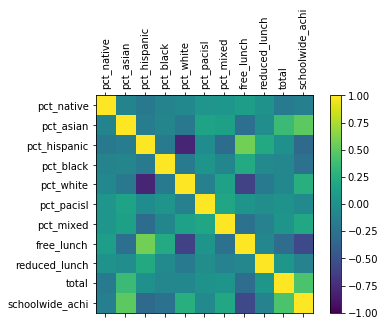

In [45]:
corr = df1_sw.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.savefig('correlation_df1_sw')
plt.show()

Notes:
- Pct_white negatively correlated with pct_hispanic
- free_lunch positively correlated with pct_hispanic
- agg_achi somewhat positively correlated with pct_asian
- agg_achi loosely negatively correlated with pct_black and free_lunch
- free_lunch negatively correlated with pct_white
- high positive correlation between past and present agg_achi, but not that great results on classifer?

- Nothing particularly strongly correlated with achievement. Maybe try a different prediction?

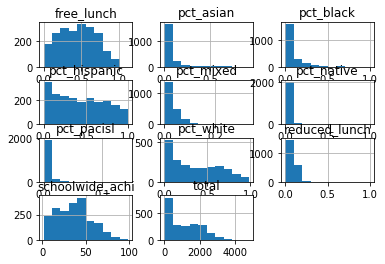

In [26]:
df1_sw.hist()
plt.show()

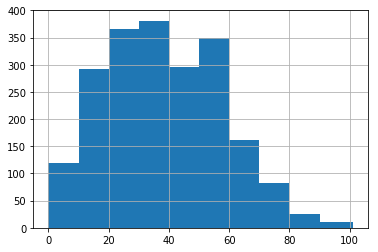

In [29]:
bins_10 = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
df1_sw.loc[ : , 'schoolwide_achi' ].hist(bins=bins_10)
plt.show()

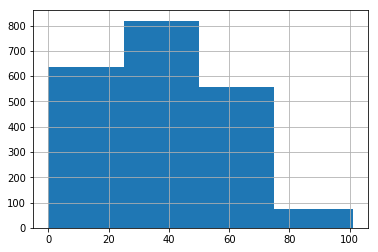

In [30]:
bins_25 = [0, 25, 50, 75, 101]
df1_sw.loc[ : , 'schoolwide_achi' ].hist(bins=bins_25)
plt.show()

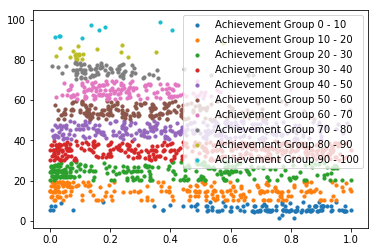

In [35]:
# find bucket, label accordingly
bin_size = 10
top_score = 100
interest_group = "pct_hispanic"

agg_achi = df1_sw.loc[:, "schoolwide_achi"]

for bin_num in range(int(top_score / bin_size)):
    group = df1_sw.loc[(agg_achi / bin_size) > bin_num].loc[(agg_achi / bin_size) < (bin_num + 1)]
    plt.scatter(group.loc[:, interest_group], 
                group.loc[:, "schoolwide_achi"], 
                s=10, 
                label='Achievement Group %i - %i'% (bin_num * bin_size, (bin_num + 1) * bin_size))
plt.legend()
plt.show()

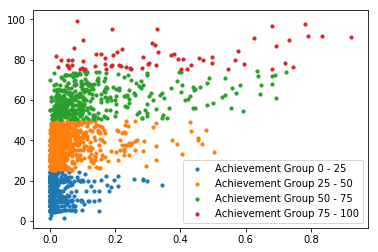

In [38]:
# find bucket, label accordingly
bin_size = 25
top_score = 100
feature_1 = "pct_asian"
feature_2 = "schoolwide_achi"

agg_achi = df1_sw.loc[:, "schoolwide_achi"]

for bin_num in range(int(top_score / bin_size)):
    group = df1_sw.loc[(agg_achi / bin_size) > bin_num].loc[(agg_achi / bin_size) < (bin_num + 1)]
    plt.scatter(group.loc[:, feature_1], 
                group.loc[:, feature_2], 
                s=10, 
                label='Achievement Group %i - %i'% (bin_num * bin_size, (bin_num + 1) * bin_size))
plt.legend()
plt.show()

https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

Notes:
- We should not be setting values to the median - the model learns that if it doesn't know, it should just set it to our median (prob around 50). This makes accuracy much lower.
- Again, I don't think Achievement group will be a very good evaluation metric as the data seems so scattered.
- pct_hispanic and free_lunch somewhat produced decision boundaries, but not great.
- pct_asian and agg_achi_past also somewhat produced decision boundaries
- Everything else idk

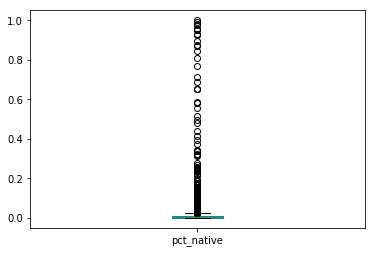

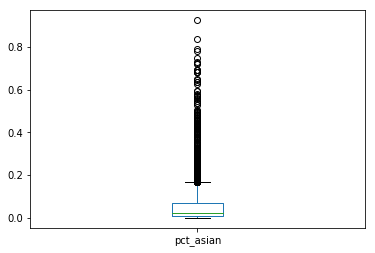

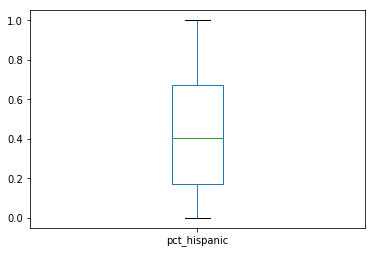

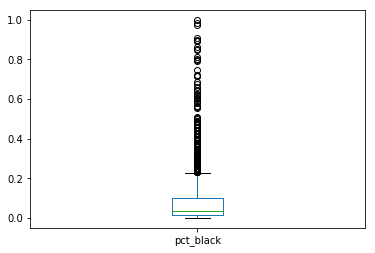

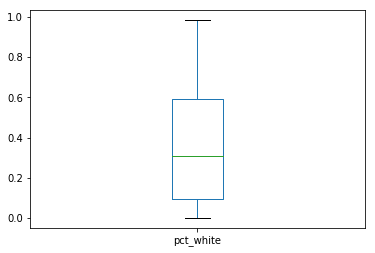

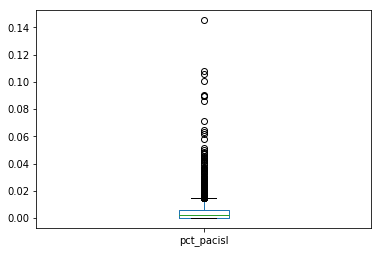

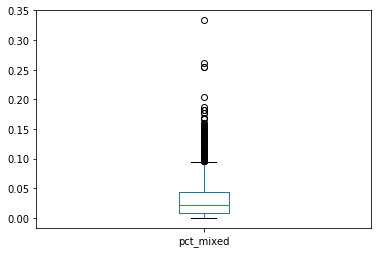

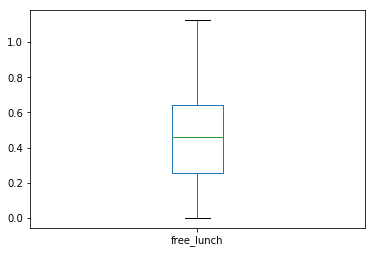

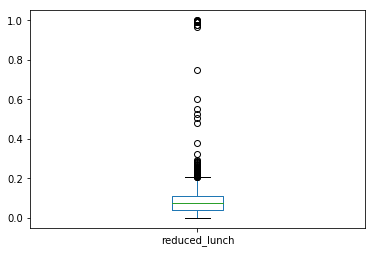

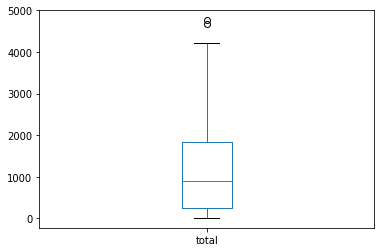

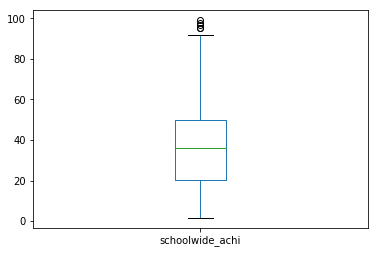

In [43]:
# Trying to figure out how to make formatting nicer

# fig = plt.figure(1)
# n_subplots=0

# for pos_subplot, column in enumerate(df1):
#     if df1[column]:
#         n_subplots += 1
#         ax = fig.add_subplot(n_subplots, 3, pos_subplot + 1)
#         df1[column].plot(kind='box', subplots=True, sharex=False, sharey=False)
# plt.show()

for column in df1_sw:
    df1_sw[column].plot(kind='box', subplots=True, sharex=False, sharey=False)
    plt.show()

Notes:
- Notice that the box and whiskers for agg\_achi and agg\_achi\_past(\_2) are pretty similar, but when we did the logistic regression, the prediction power wasn't that high because school performance varied a lot from year to year.
- Want to figure out the change in performance from one year to the next for individual schools

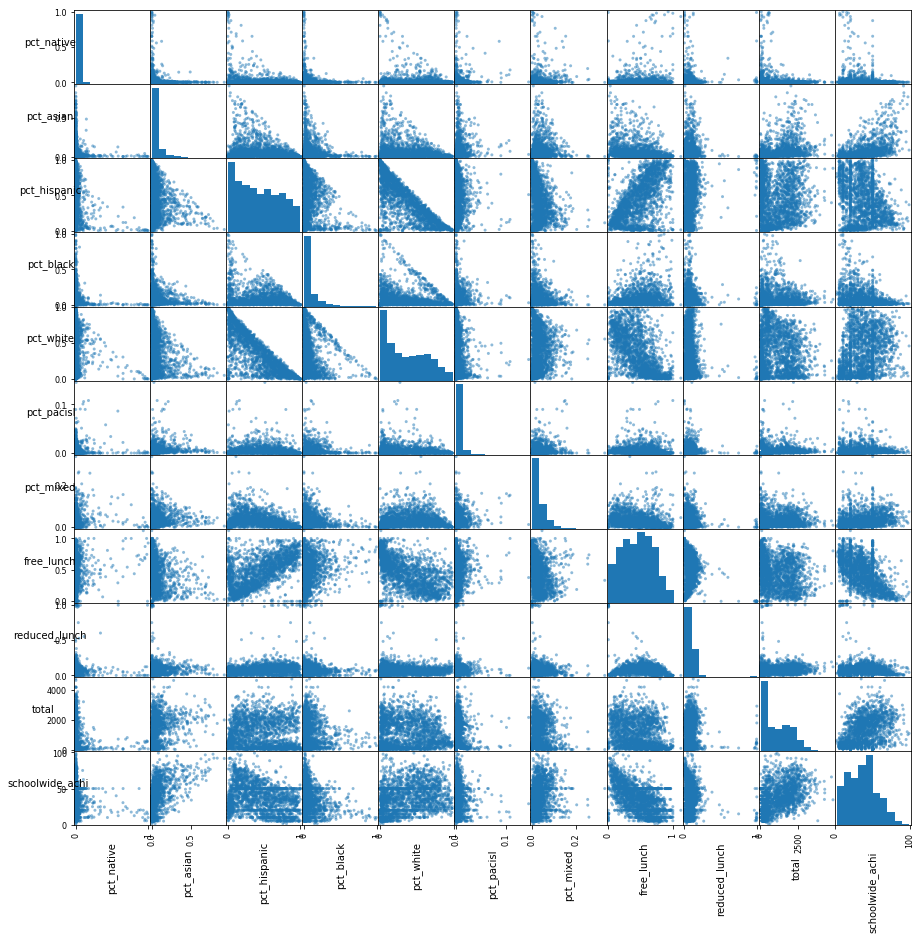

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix = scatter_matrix(df1_sw, figsize= (15, 15))

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 0)

plt.savefig('scatter_df1_sw')
plt.show()

Notes:
- The relationships def look non-linear
- Let's try SVR?

## SVR Attempt

In [50]:
data = df1_sw.values
features = data[:, 0:19]
labels = data[:, 19]


IndexError: index 19 is out of bounds for axis 1 with size 11

In [48]:
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(train, train_labels)
svrScore = svmRg.score(test, test_labels)
svrScore # L1 loss score, uses loss function 'epsilon-insensitive'

ImportError: No module named 'sklearn'